In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
#Data Preparation
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255.0
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [10]:
#Split the data into training and validation sets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [11]:
#Define a simple CNN
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Train the model
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8994 - loss: 0.3338 - val_accuracy: 0.9725 - val_loss: 0.0911
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9818 - loss: 0.0586 - val_accuracy: 0.9842 - val_loss: 0.0551
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9837 - val_loss: 0.0543
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9937 - loss: 0.0215 - val_accuracy: 0.9850 - val_loss: 0.0518
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9860 - val_loss: 0.0535
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9827 - val_loss: 0.0669
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9971 - loss: 0.0084 - val_accuracy: 0.9858 - val_loss: 0.0556
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9976 -

In [17]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9826 - loss: 0.0657
Test loss: 0.0546
Test accuracy: 0.9855


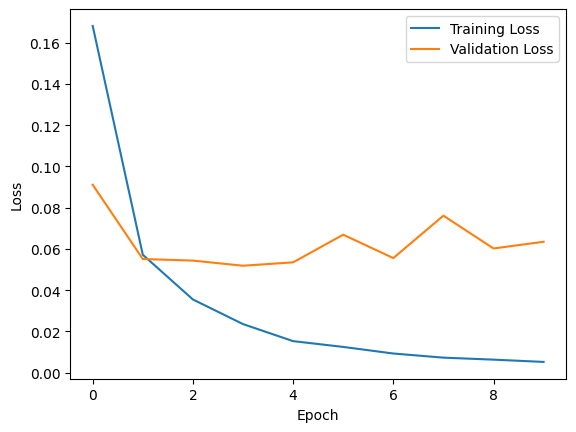

In [18]:
#Visualize Training History
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#Make Prediction
x_new_data=x_test[:5]
prediction=model.predict(x_new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
